# Introduction to `aggregate` for actuaries

## Outline

* `!pip install aggregate`
* import build, display it, follow instructions
* Look at first two dice examples (dice, dice + rand(1..6)); see prob min/max loss correct 
* Realistic example


## Provenance

* Oct 2022 created new 

In [1]:
from aggregate import build
from aggregate.extensions import *

Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 859 ms (started: 2022-10-29 22:50:15 +01:00)


In [2]:
build

time: 15 ms (started: 2022-10-29 22:49:34 +01:00)


In [3]:
build.list().head()

AttributeError: 'Underwriter' object has no attribute 'list'

time: 500 ms (started: 2022-10-29 22:40:29 +01:00)


In [7]:
build.knowledge.filter(regex='agg|B.*l', axis=0)

program  \
kind name                                                                                                   
agg  A.Basic01            agg A.Basic01 dfreq  [1]  dsev  [0 1]                                   note...   
     A.Basic02            agg A.Basic02 dfreq  [12]  dsev  [0 1]                                  note...   
     A.Basic03            agg A.Basic03 dfreq  [1 2 3]  dsev  [1 2 10]                            note...   
     A.Basic04            agg A.Basic04 dfreq  [1 2 3]   [.5 1/4 1/4]  dsev  [1 2 10]               no...   
     A.Basic05            agg A.Basic05 dfreq  [1 2 3]    dsev  [1 2 10]   [.4 .4 .2]               no...   
...                                                                                                   ...   
     a.Novice.2.Rolls     agg a.Novice.2.Rolls         dfreq  [2]    dsev  [1:6]                  note...   
     a.Novice.5.Rolls     agg a.Novice.5.Rolls         dfreq  [5]    dsev  [1:6]                  note...   
     a.Novice.Big.Rolls   agg a.Novice.Big.Rolls       dfreq  [1:4]  dsev  [1:16]                 note...   
     a.Novice.Dice.Roll   agg a.Novice.Dice.Roll       dfreq  [1:6]  dsev  [1]                    note...   
     a.Novice.Dice.Roll2  agg a.Novice.Dice.Roll2      dfreq  [1]    dsev  [1:6]                  note...   

                                                                                                     spec  
kind name                                                                                                  
agg  A.Basic01            {'name': 'A.Basic01', 'freq_name': 'empirical', 'freq_a': [1.0], 'freq_b': [...  
     A.Basic02            {'name': 'A.Basic02', 'freq_name': 'empirical', 'freq_a': [12.0], 'freq_b': ...  
     A.Basic03            {'name': 'A.Basic03', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...  
     A.Basic04            {'name': 'A.Basic04', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...  
     A.Basic05            {'name': 'A.Basic05', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...  
...                                                                                                   ...  
     a.Novice.2.Rolls     {'name': 'a.Novice.2.Rolls', 'freq_name': 'empirical', 'freq_a': [2.0], 'fre...  
     a.Novice.5.Rolls     {'name': 'a.Novice.5.Rolls', 'freq_name': 'empirical', 'freq_a': [5.0], 'fre...  
     a.Novice.Big.Rolls   {'name': 'a.Novice.Big.Rolls', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0...  
     a.Novice.Dice.Roll   {'name': 'a.Novice.Dice.Roll', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0...  
     a.Novice.Dice.Roll2  {'name': 'a.Novice.Dice.Roll2', 'freq_name': 'empirical', 'freq_a': [1.0], '...  

[121 rows x 2 columns]

time: 32 ms (started: 2022-10-29 22:41:16 +01:00)


In [23]:
build.list('B.*l$', 'agg')

,spec,program
name,,
Basic.Dice.Roll,"{'name': 'Basic.Dice.Roll', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3...",agg Basic.Dice.Roll dfreq [1:6] dsev [1] note{The r...


time: 0 ns (started: 2022-10-27 12:08:24 +01:00)


In [17]:
re.match('B.*l$', 'Basic Rolls')

time: 0 ns (started: 2022-10-27 12:06:48 +01:00)


In [5]:
build.knowledge

program  \
kind name                                                                                                 
agg  A.Basic01          agg A.Basic01 dfreq  [1]  dsev  [0 1]                                   note...   
     A.Basic02          agg A.Basic02 dfreq  [12]  dsev  [0 1]                                  note...   
     A.Basic03          agg A.Basic03 dfreq  [1 2 3]  dsev  [1 2 10]                            note...   
     A.Basic04          agg A.Basic04 dfreq  [1 2 3]   [.5 1/4 1/4]  dsev  [1 2 10]               no...   
     A.Basic05          agg A.Basic05 dfreq  [1 2 3]    dsev  [1 2 10]   [.4 .4 .2]               no...   
...                                                                                                 ...   
port K.PIR.Discrete     port K.PIR.Discrete note{PIR Discrete case study. Change 8 to 9 for the equa...   
     K.PIR.HuSCS.Gross  port K.PIR.HuSCS.Gross note{PIR Hurricane SCS gross case study.} agg SCS 70 ...   
     K.PIR.HuSCS.Net    port K.PIR.HuSCS.Net note{PIR Hurricane SCS net case study.} agg Net.SCS 70 ...   
     K.PIR.Tame         port K.PIR.Tame note{PIR Tame case study. For reinsurance see text.} agg Tam...   
sev  One                                                                              sev One dsev  [1]   

                                                                                                   spec  
kind name                                                                                                
agg  A.Basic01          {'name': 'A.Basic01', 'freq_name': 'empirical', 'freq_a': [1.0], 'freq_b': [...  
     A.Basic02          {'name': 'A.Basic02', 'freq_name': 'empirical', 'freq_a': [12.0], 'freq_b': ...  
     A.Basic03          {'name': 'A.Basic03', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...  
     A.Basic04          {'name': 'A.Basic04', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...  
     A.Basic05          {'name': 'A.Basic05', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...  
...                                                                                                 ...  
port K.PIR.Discrete     {'spec': [('agg', 'Discrete.X1', {'name': 'Discrete.X1', 'exp_en': 1.0, 'sev...  
     K.PIR.HuSCS.Gross  {'spec': [('agg', 'SCS', {'name': 'SCS', 'exp_en': 70.0, 'sev_name': 'lognor...  
     K.PIR.HuSCS.Net    {'spec': [('agg', 'Net.SCS', {'name': 'Net.SCS', 'exp_en': 70.0, 'sev_name':...  
     K.PIR.Tame         {'spec': [('agg', 'Tame.A', {'name': 'Tame.A', 'exp_en': 1.0, 'sev_name': 'g...  
sev  One                {'sev_name': 'dhistogram', 'sev_xs': [1.0], 'sev_ps': [1.0], 'name': 'One', ...  

[132 rows x 2 columns]

time: 47 ms (started: 2022-10-29 22:40:52 +01:00)


In [4]:
a

[autoreload of aggregate.distributions failed: Traceback (most recent call last):
  File "C:\Users\steve\miniconda3\envs\smve38\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\steve\miniconda3\envs\smve38\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\steve\miniconda3\envs\smve38\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\steve\miniconda3\envs\smve38\lib\site-packages\IPython\extensions\autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "C:\Users\steve\miniconda3\envs\smve38\lib\site-packages\IPython\extensions\autoreload.py", line 280, in update_instances
    ref.__class__ = new
TypeError: __class__ assignment: 'Aggregate' object layout differs from 'Aggregate'
]


NameError: name 'a' is not defined

time: 16 ms (started: 2022-10-29 22:49:18 +01:00)


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,3.500,,,487.950m,,,0.000
Agg,12.250,12.250,222.045a,553.283m,553.283m,10.436f,286.888m


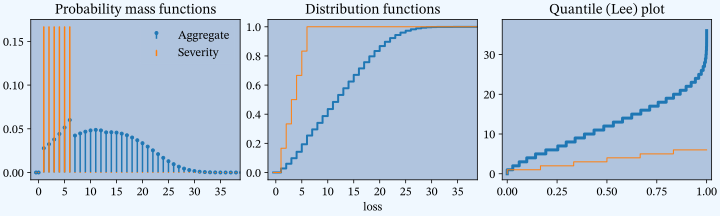

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,2.000,,,0.000,,,
Agg,7.000,7.000,-333.067a,345.033m,345.033m,-2.220f,0.000


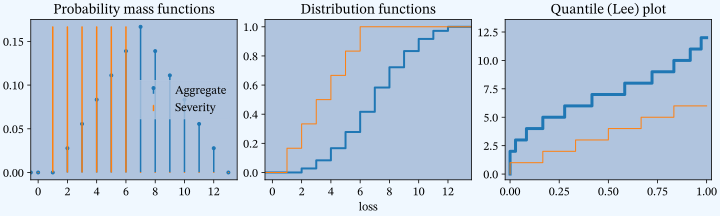

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,5.000,,,0.000,,,
Agg,17.500,17.500,-444.089a,218.218m,218.218m,-11.213f,0.000


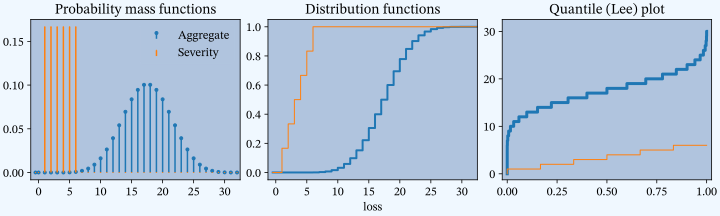

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,8.500,8.500,0.000,542.326m,542.326m,0.000,0.000
Freq,2.500,,,447.214m,,,0.000
Agg,21.250,21.250,-888.178a,563.602m,563.602m,-9.992f,394.289m


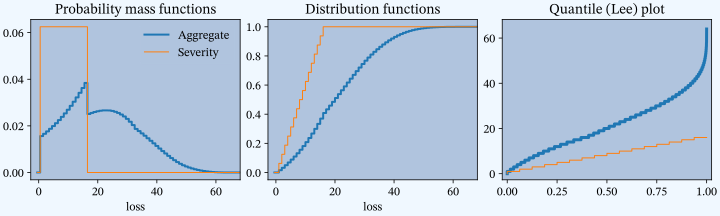

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.000,1.000,0.000,0.000,0.000,,
Freq,3.500,,,487.950m,,,0.000
Agg,3.500,3.500,222.045a,487.950m,487.950m,888.178a,0.000


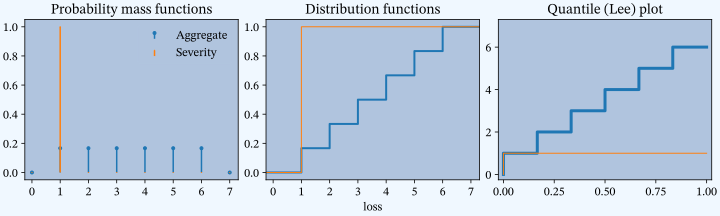

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,1.000,,,0.000,,,
Agg,3.500,3.500,-111.022a,487.950m,487.950m,222.045a,0.000


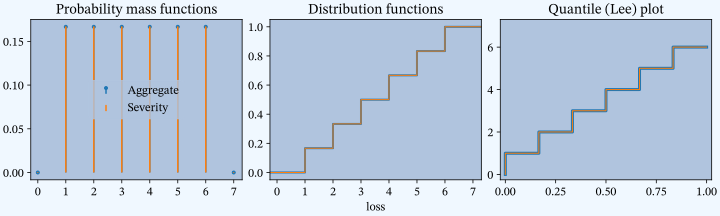

time: 3.14 s (started: 2022-10-29 22:50:16 +01:00)


In [2]:
a, df = build.show('Novice')  # Poi.*Rolls?$')

In [14]:
from IPython.display import Image, display

time: 0 ns (started: 2022-10-27 11:30:46 +01:00)


In [24]:
a.q(1-2e-15)

127.0

time: 0 ns (started: 2022-10-26 16:26:26 +01:00)


<AxesSubplot:xlabel='loss'>

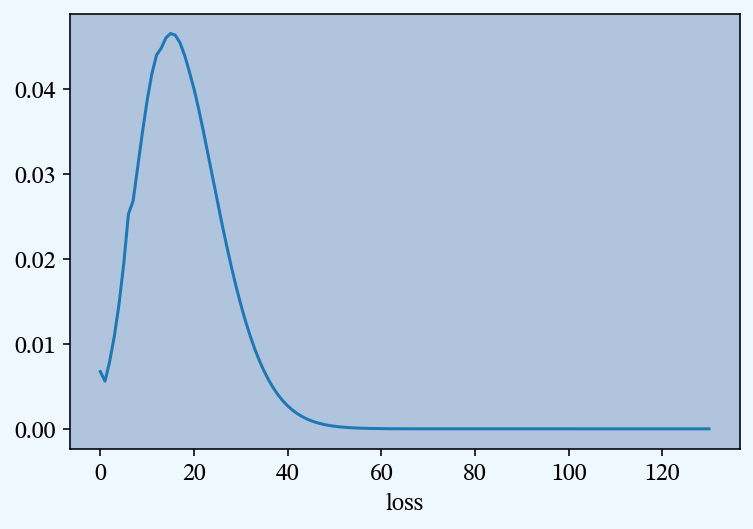

time: 125 ms (started: 2022-10-26 16:31:08 +01:00)


In [34]:
a.density_df.query('p_total > 0').p_total.plot() # .style.format(lambda x: f'{x:.15g}')

In [ ]:
from aggregate import build

time: 625 ms (started: 2022-10-26 19:26:10 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
a = build('agg PDR 1 claim dsev [1:6] poisson', log2=8, bs=1)
display(a)
a.density_df.query('p_total > 0')#.style.format(lambda x: f'{x:.6g}')

In [40]:
73/3.5

20.857142857142858

time: 0 ns (started: 2022-10-26 19:22:45 +01:00)


In [3]:
p = lambda n: np.exp(-1) if n==0 else p(n-1) / n
ps = pd.DataFrame([(n, p(n)) for n in range(31)])
ps#.style.format(lambda x: f'{x:.6g}')

,0,1
0,0,367.879m
1,1,367.879m
2,2,183.940m
3,3,61.313m
4,4,15.328m
5,5,3.066m
6,6,510.944u
7,7,72.992u
8,8,9.124u
9,9,1.014u


time: 15 ms (started: 2022-10-26 19:26:33 +01:00)


In [32]:
sum(ps)

1.0

time: 0 ns (started: 2022-10-26 19:20:10 +01:00)


## Realistic Insurance Example

### Assumptions 

You are given the following infomation about a book of liability insurance business. 

1. Premium equals &curren;2000 and the expected loss ratio equals 67.5%.
2. Ground-up severity has been fit to a lognormal distribution with a mean of &curren;50 and a CV (coefficient of variation) of 1.25.
3. All policies have a limit of &curren;1000 and no deductible or retention.
4. Frequency is modeled using a Poisson distribution.

You model aggregate losses $X$ using the collective risk model.

### Questions
1. Compute the expected insured severity and expected claim count.
3. Compute the expected value, standard deviation, CV, and skewness of $X$.
5. Compute the probability $X$ exceeeds the premium. 
6. For $X$, compute:
    1. The probability losses exceed &curren;2500
    2. The expected value of lossses limited to &curren;2500
    3. The expected value of losses in excess of &curren;2500

The agg language defines an aggregte distribution in four parts:

1. `agg` (keyword) *name*
2. exposure clause specifying expected loss and (optional) policy limit and attachment, `premium at`, `lr`, and `xs` are keywords
3. `sev` (keyword) *specification of severity distribution*
4. *specification of frequency distribution* 

In [4]:
a = build('agg InsuranceExample '
          '2000 premium at 0.675 lr 1000 xs 0 '
          'sev lognorm 50 cv 1.25 '
          'poisson')
a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,49.945,49.945,-953.312p,1.228,1.228,44.239n,4.590
Freq,27.030,,,192.345m,,,192.345m
Agg,1.350k,1.350k,-20.473u,304.564m,304.531m,-110.102u,679.013m


time: 250 ms (started: 2022-10-26 17:39:04 +01:00)


In [8]:
# prob losses exceed 2000, 2500
# also have cdf, pmf, pdf functions
a.sf(2000), a.sf(2500)

(0.06956644783323884, 0.010527315523935044)

time: 0 ns (started: 2022-10-26 19:08:04 +01:00)


In [27]:
# lev and epd ratio
a.density_df.loc[[2500]]

,loss,p,p_total,p_sev,log_p,log_p_sev,F,F_sev,S,S_sev,lev,exa,exlea,e,epd,exgta,exeqa
loss,,,,,,,,,,,,,,,,,
2500,2.500k,2.662u,2.662u,0.000,-12.836,inf,989.473m,1.000,10.527m,0.000,1.348k,1.348k,1.335k,1.350k,1.818m,2.733k,2.500k


time: 16 ms (started: 2022-10-26 19:15:43 +01:00)


In [20]:
# epd in  ¤
default_agg = a.agg_m - a.density_df.loc[2500, 'lev']
default_agg

2.482313814164854

time: 0 ns (started: 2022-10-26 19:11:41 +01:00)


### Questions (academic version)
1. Compute the severity lognormal mu and sigma.
2. Compute the expected insured severity and expected claim count.
3. Compute the expected value, standard deviation, CV, and skewness of $X$.
4. Compute the probability $X$ exceeds the premium using the following matched-moment approximations: 
    1. normal
    1. gamma
    1. lognormal
    1. shifted gamma
    1. shifted lognormal 
5. Compute the probability $X$ exceeeds the premium. 
6. Using the $X$ and a lognormal approximation, compute:
    1. The probability losses exceed &curren;2500
    2. The expected value of lossses limited to &curren;2500
    3. The expected value of losses in excess of &curren;2500


In [12]:
# the first program I made in VBA! 
from aggregate import mu_sigma_from_mean_cv
mu_sigma_from_mean_cv(50, 1.25)

(3.441531333195883, 0.9700429601128635)

time: 0 ns (started: 2022-10-26 19:09:52 +01:00)


In [15]:
# approximate survival functions 
fz = a.approximate('all')
fz['agg'] = a

df = pd.DataFrame({k: v.sf(2000) for k, v in fz.items()}.items(), 
             columns=['Approximation', 'Value']
            ).set_index("Approximation")
df['Error'] = df.Value / df.loc['agg', 'Value'] - 1
df.sort_values('Value').style.format(lambda x: f'{x:.2%}')

,Value,Error
Approximation,,
lognorm,5.29%,-24.01%
slognorm,5.58%,-19.78%
norm,5.69%,-18.18%
gamma,6.95%,-0.05%
agg,6.96%,0.00%
sgamma,7.04%,1.25%


time: 47 ms (started: 2022-10-26 19:10:33 +01:00)


In [16]:
# lev easy to compute exactly
from aggregate import lognorm_lev

time: 0 ns (started: 2022-10-26 19:11:04 +01:00)


In [26]:
mu, sigma = mu_sigma_from_mean_cv(a.agg_m, a.agg_cv)
lev = lognorm_lev(mu, sigma, 1, 2500)
default = a.agg_m - lev
epd = default / a.agg_m
pd.DataFrame((lev, default, default_agg, epd, default_agg / a.agg_m),
             index=pd.Index(['Lognorm LEV', 'Lognorm Default', 'Agg Default', 'Lognorm EPD', 'Agg EPD'], name='Item'),
             columns=['Value']).style.format(lambda x: f'{x:.3f}')

,Value
Item,
Lognorm LEV,1346.178
Lognorm Default,3.822
Agg Default,2.482
Lognorm EPD,0.003
Agg EPD,0.002


time: 0 ns (started: 2022-10-26 19:15:15 +01:00)


## Extensions

1. Repeat using different limits, attachments, loss ratios, etc.
2. Repeat using a negative binomial (gamma-mixed Poisson) assumption, with mixing cv ...
3. Repeat with different severities 
4. Repeat with a range of frequency assumptions 


## Observations

* Once you can compute exactly, you lose interest in the approximations; don't care about the μ and σ values, or the approximating distributions. These account for the non-core magic functions (`lognorm_lev`, `mu_sigma_from_mean_cv`). We won't see these again.

\
\
Stephen J Mildenhall, Created Oct 26, 2022